# AI/ML with Python: Web Scraping & Sentiment Analysis
## Analyzing Stock Data Sentiments with NLP

In addition to leveraging social media insights and chart analysis, news analysis is a pivotal aspect of informed decision-making in the investment world. Major events, such as Twitter's high-profile takeover, have the potential to significantly impact markets. Given the relentless influx of news on a daily basis, it's impractical to manually analyze and interpret the sentiments embedded in all these news stories.

This is where sentiment analysis becomes invaluable. By employing advanced sentiment analysis techniques, investors can efficiently process and understand the emotions and opinions expressed in hundreds of news headlines every day.

In this exercise, we'll start by importing the required libraries and methods. Our first step involves data collection, where we'll focus on extracting headlines from all five provided HTML files.

To begin, we'll begin by importing BeautifulSoup. Load the 5 html files and put them all into a list, where we will then use BeautifulSoup to scrape the information from there. **Note that the code that are marked by the comments "TODO" are for you to fill them up**.

In [1]:
from bs4 import BeautifulSoup
import os

html_tables = {}
fb_path = 'fb_05ene.html'
fb1_path = 'fb_22sep.html'
tsla_path = 'tsla_22sep.html'
tsla2_path = 'tsla_05ene.html'
tsla3_path = 'tsla_26nov.html'

ls = []
ls.append(fb_path)
ls.append(fb1_path)
ls.append(tsla_path)
ls.append(tsla2_path)
ls.append(tsla3_path)

In [3]:
# For every table in the datasets folder...
for table_name in ls:
    # TODO: Input the directory of your downloaded html files, for instance: f'/Users/jacky/Downloads/{table_name}'
    table_path = f'/Users/chrixchange/Downloads/{table_name}'
    # Open as a python file in read-only mode
    table_file = open(table_path, 'r')

    html = BeautifulSoup(table_file)
    # TODO: Find 'news-table' in the Soup and load it into 'html_table' (hint: use .find())
    html_table = html.find(id='news-table')
    # Add the table to our dictionary
    html_tables[table_name] = html_table

Once we have loaded them all into the html tables, we'll attempt to print the headlines that we have extracted using BeautifulSoup. In this case, we will attempt to print out the first 4 headlines of Facebook.

In [4]:
# Read one single day of headlines 
fb = html_tables['fb_22sep.html']

# Get all the table rows tagged in HTML with <tr> into 'fb_tr'
fb_tr = fb.findAll('tr')

# For each row...
for i, table_row in enumerate(fb_tr):
    
    # TODO: Store the text of the element 'a' into 'link_text'
    link_text = table_row.a.text
    
    # TODO: Store the text of the element 'td' into 'data_text'
    data_text = table_row.td.text
    
    # Print the count
    print(f'File number {i+1}:')
    
    # Print the contents of 'link_text' and 'data_text' 
    print(link_text)
    print(data_text)
    # The following exits the loop after four rows to prevent spamming the notebook, do not touch
    if i == 3:
        break

File number 1:
How former Facebook and Google engineer Bret Taylor earned Marc Benioff's trust at Salesforce
Sep-22-18 11:08AM  
File number 2:
White House Drafts Order To Look Into Google, Facebook Practices
12:02AM  
File number 3:
Facebook Withdraws Direct Promotion of Political Campaigns
Sep-21-18 06:21PM  
File number 4:
Facebook's Plan to Pull Back Campaign Support to Trump in 2020
06:18PM  


Next, we will attempt to pass all of the text into a list called `parsed_news`. This will contain the ticker, date, time and headline. We will be collating our extracted data for analysis.

In [5]:
# Hold the parsed news into a list
parsed_news = []

# Iterate through the news
for file_name, news_table in html_tables.items():
    
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):

        # TODO: Store the text from the tr tag into text
        text = x.text

        # Split the text in the td tag into a list 
        date_scrape = x.td.text.split()
        
        # If the length of 'date_scrape' is 1, load 'time' as the only element
        if len(date_scrape) == 1:
            time = date_scrape[0]
        # If not, load 'date' as the 1st element and 'time' as the second
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split("_")[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, x.a.text])

With the data collected, we will now proceed to download ntlk. Ensure that you have 'vader_lexicon' downloaded so that we can begin using VADER for our sentiment analysis.

In [7]:
#nltk.download('vader_lexicon')

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}


# TODO: Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Update the lexicon
vader.lexicon.update(new_words)

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chrixchange/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Having initalised VADER, we will now go back to the previous read data and turn it into a structured format. Ensure you have the pandas package installed and that you are aware of how to utilise it to build a column of data.

In [10]:
pip install pandas

  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

# Use these column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(parsed_news, columns=columns)

# TODO: Iterate through the headlines and get the polarity scores
scores = scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames
scored_news = scored_news.join(scores_df)

# Convert the date column from string to datetime
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date

scored_news

/var/folders/st/dp79pqr92kq192fkd_gp5x0m0000gn/T/ipykernel_47101/78456933.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  scored_news['date'] = pd.to_datetime(scored_news.date).dt.date


,ticker,date,time,headline,neg,neu,pos,compound
0,fb,2019-01-04,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...",0.000,0.631,0.369,0.4767
1,fb,2019-01-04,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,0.000,1.000,0.000,0.0000
2,fb,2019-01-04,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,0.000,1.000,0.000,0.0000
3,fb,2019-01-04,04:53PM,3 Tech Trends to Watch in 2019,0.000,1.000,0.000,0.0000
4,fb,2019-01-04,04:30PM,Will Denver's tech growth continue in 2019?,0.000,0.698,0.302,0.3818
...,...,...,...,...,...,...,...,...
495,tsla,2018-11-16,08:31AM,VW says could build up to 15 million electric ...,0.000,1.000,0.000,0.0000
496,tsla,2018-11-16,08:12AM,Elon Musk to Prowl Production Lines in Push fo...,0.000,1.000,0.000,0.0000
497,tsla,2018-11-16,06:39AM,Tesla cuts prices on solar power systems as it...,0.155,0.845,0.000,-0.2960
498,tsla,2018-11-16,06:00AM,Tesla Stretch Pushes Customers to Open Wallets...,0.000,1.000,0.000,0.0000


We have 500 rows x 8 columns of fb and tsla data in a table format. 

Moving on, ensure you have matplotlib installed. We will do some basic analysis to find the mean compound score of these stock sentiments. If you recall, compound gives an overall sentiment analysis based on the level of neutrality, positivity and negativity of both stocks. 

If you have done everything correctly until now, you should able to plot a graph of the sentiment analysis of fb and tsla stocks from September of 2018 to January of 2019.

In [13]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 1.0 MB/s eta 0:00:000:00:010:00:01
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.2/258.2 kB 2.4 MB/s eta 0:00:003.1 MB/s eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


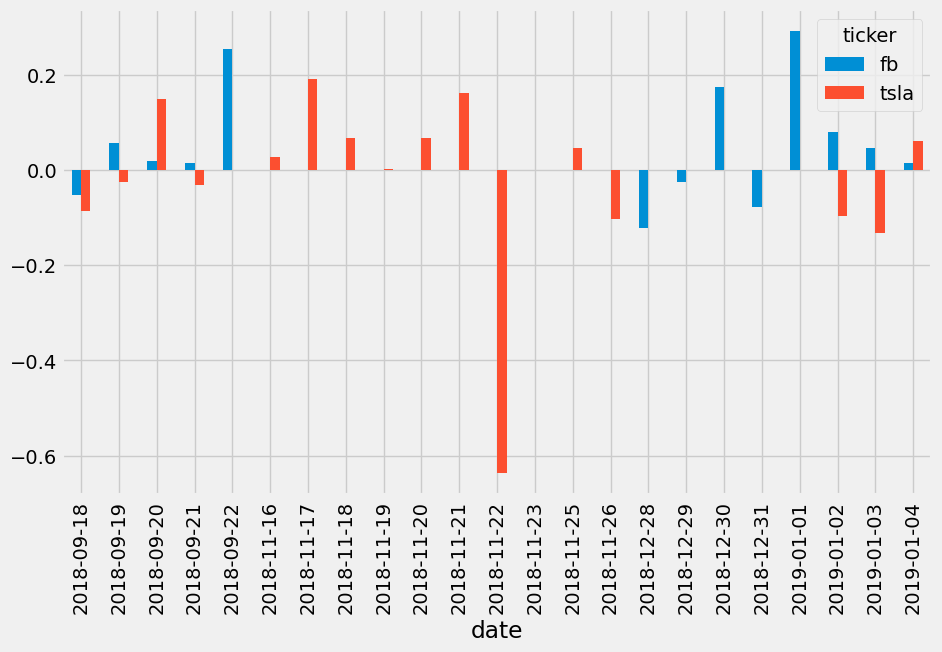

In [14]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scored_news.groupby(['date', 'ticker'])
mean_c = mean_c['compound'].mean()

# Unstack the column ticker
mean_c = mean_c.unstack('ticker');

# Plot a bar chart with pandas
mean_c.plot.bar(figsize = (10, 6));

Awesome, with that done, we now proceed to dig in deeper, what is the sentiment within a particular day? Let's zoom in on **3rd January 2019** (i.e. "2019-01-03") to analyze facebook's stock. Refer to the below code for the filtered dataframe.

In [15]:
scored_news['date'] = pd.to_datetime(scored_news['date'])

# TODO: Filter the dataset for the date
filtered_df = scored_news[scored_news['date'] == '2019-01-03']
filtered_df = filtered_df.set_index(['ticker', 'date'])
filtered_df = filtered_df.xs('fb')

# TODO: Set the index of filtered_df to time 
filtered_df = filtered_df.set_index('time')

# TODO: Sort by index
filtered_df = filtered_df.sort_index()

filtered_df

,headline,neg,neu,pos,compound
time,,,,,
01:31PM,Take the Money And Run From Twilio Stock,0.000,1.000,0.000,0.0000
01:36PM,What's Next For Apple (AAPL) After It Slashed ...,0.147,0.853,0.000,-0.2263
03:14PM,Zuckerberg Paused His Selling of Facebook Shar...,0.000,0.662,0.338,0.6249
03:26PM,Is Facebook Stock the Best FANG Stock to Buy?,0.000,0.656,0.344,0.6369
04:10PM,"Google Stock Upgraded, Viewed As 'Most Defensi...",0.000,0.878,0.122,0.1010
05:24PM,Facebook (FB) Reportedly Testing Dark Mode on ...,0.000,1.000,0.000,0.0000
05:32PM,[$$] Facebook Begins New Year in Fixer-Upper Mode,0.000,1.000,0.000,0.0000
05:45PM,Investors Are Focused Too Closely on Facebook ...,0.000,0.652,0.348,0.5859
06:00AM,Why Internet Censorship Doesnt Work and Never ...,0.000,1.000,0.000,0.0000


Once done, we will once again plot our graph to analyse the negative, neutral and positive sentiments throughout the day at different timings. Run the below code, this should give you a colorful barcharts representing all the different sentiments throughout the day at different timings.

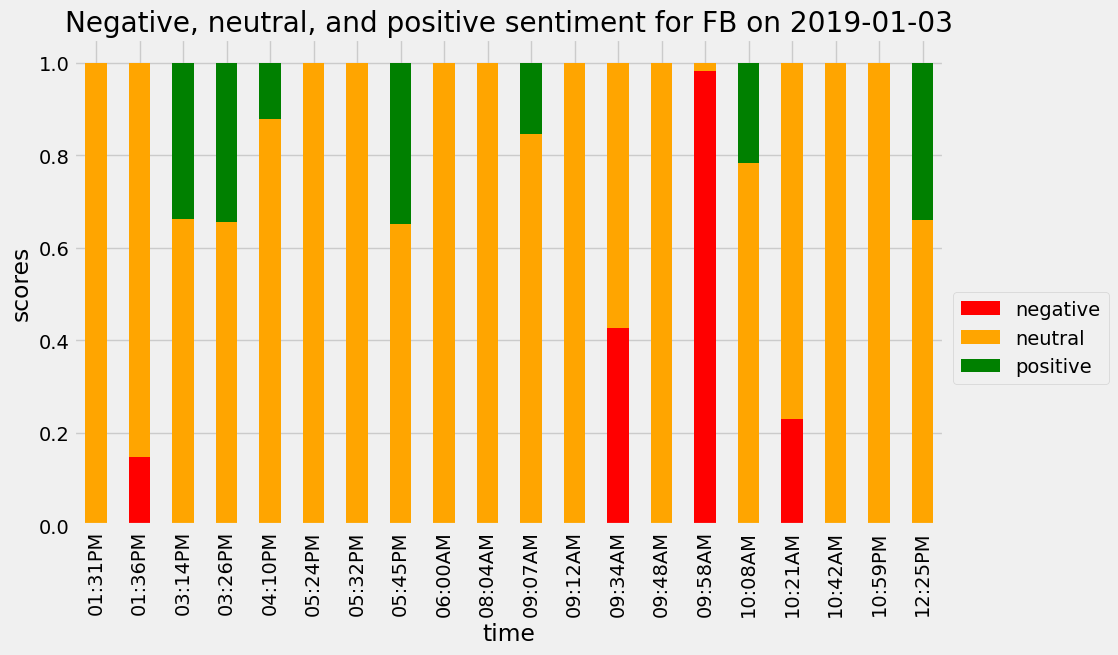

In [16]:
TITLE = "Negative, neutral, and positive sentiment for FB on 2019-01-03"
COLORS = ["red","orange", "green"]

# Drop the columns that aren't useful for the plot
plot_day = filtered_df.drop(['compound', 'headline'], axis=1)

# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'neutral', 'positive']

# Plot a stacked bar chart
plot_day.plot.bar(stacked=True, figsize=(10, 6), title=TITLE, color=COLORS).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel('scores');